# Model prototype

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [173]:
# Constants
class const:
    N = 100
    MAX_TIME = 20 # seconds
    INTERACTION_DISTANCE = 0.03
    FOOD_VALUE = 20
    GROW_PERIOD = 5

const = const()

In [174]:
class bot:
    def __init__(self,xy=[],max_speed=0.01,health=20):
        if len(xy)==0:
            self.xy = np.random.rand(2)
        else:
            self.xy = xy
        self.speed = max_speed
        self.health = health
        
    def move(self,harm=0.5):
        self.xy = np.minimum(1,np.maximum(0,self.xy+np.random.normal(size=2)*self.speed))
        self.health -= harm

In [175]:
class bots:
    def __init__(self,n=100):
        self.bots = list()
        for i in range(n):
            self.bots.append(bot())
            
    def move(self):
        for i in range(len(self.bots)):
            self.bots[i].move()
    
    def die(self):
        for i in range(len(self.bots)-1,-1,-1):
            if self.bots[i].health<0:
                del self.bots[i]
        
    def distance(xy1,xy2): return np.linalg.norm(xy1-xy2)
        
    def procreate(self, min_health=10):
        for i in range(1,len(self.bots)):
            for j in range(i):
                if (bots.distance(self.bots[i].xy, self.bots[j].xy) < const.INTERACTION_DISTANCE and 
                    self.bots[i].health  > min_health and 
                    self.bots[j].health > min_health):
                    self.bots[i].health -= min_health
                    self.bots[j].health -= min_health
                    self.bots.append(bot(health=min_health*2 , 
                                         xy=np.mean([self.bots[i].xy,self.bots[j].xy],axis=0).tolist()))
                    
    def eat(self,food):
        for i in range(1,len(self.bots)):
            for j in range(food.xy.shape[0]):
                if bots.distance(self.bots[i].xy, food.xy[j,:]) < const.INTERACTION_DISTANCE:
                    self.bots[i].health += const.FOOD_VALUE
                    food.xy[j,:] = np.random.rand(1,2)

In [185]:
class food_class:
    def __init__(self,n=50):
        self.xy = np.random.rand(n,2)
        
    def grow(self,count):
        if count % const.GROW_PERIOD == 0:
            self.xy = np.vstack((self.xy , np.random.rand(1,2)))

In [186]:
def draw_animals(a,xy,clr):
    if len(a.collections)==0:
        a.scatter(xy[:,0],xy[:,1],c=clr,vmin=-1, vmax=100)
    else:
        a.collections[0].set_offsets(xy)
        a.collections[0].set_array(clr)
        
def draw_graph(a,count,n):
    '''Update the population graph on the right with a new number'''
    if len(a.lines)==0:
        a.plot([count],[n],'.-')
        #a.autoscale(enable=True)
    else:
        a.lines[0].set_xdata(np.append(a.lines[0].get_xdata() , [count]))
        a.lines[0].set_ydata(np.append(a.lines[0].get_ydata() , [n]))
        a.set_xlim(0,count)
        a.set_ylim(0,max(a.get_ylim()[1],n))
        
def draw_food(a,xy):
    if len(a.lines)==0:
        a.plot(xy[:,0],xy[:,1],'.g')
    else:
        a.lines[0].set_xdata(xy[:,0])
        a.lines[0].set_ydata(xy[:,1])

<IPython.core.display.Javascript object>


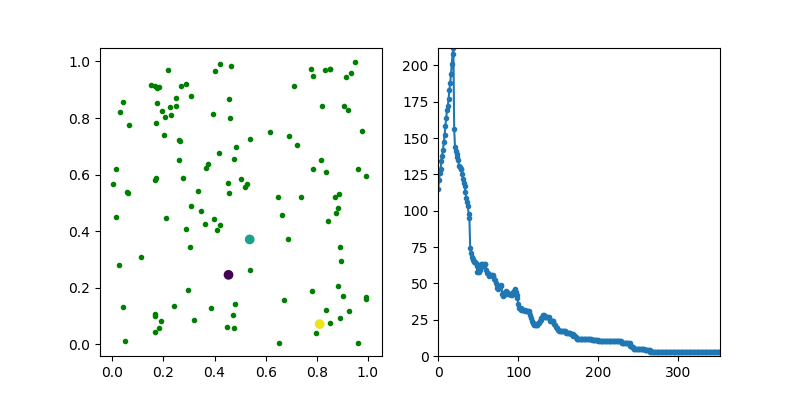

start
stop


In [187]:
%matplotlib notebook
# This comment above is necessary; without it it doesn't render eagerly, so no animations

b1 = bots(const.N)
food = food_class()

#a1 = plt.axes()
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(8,4)
tic = time.time()
print('start')

count = 0
while time.time()-tic < const.MAX_TIME:
    if len(b1.bots)==0:
        print('All dead')
        break
    food.grow(count)
    b1.move()
    b1.eat(food)
    b1.die()
    b1.procreate()
    
    draw_food(ax1,food.xy)
    xy = np.array([b.xy for b in b1.bots])
    clr = 100-np.array([b.health for b in b1.bots])
    draw_animals(ax1,xy,clr)
    draw_graph(ax2,count,len(b1.bots))
    fig.canvas.draw()
    count += 1
print('stop')